In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [4]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7.0,B,2,1.0,1.0,11.0,NaN
1,1000009,P00113442,M,26-35,17.0,C,0,0.0,3.0,5.0,NaN
2,1000010,P00288442,F,36-45,1.0,B,4+,1.0,5.0,14.0,NaN
3,1000010,P00145342,F,36-45,1.0,B,4+,1.0,4.0,9.0,NaN
4,1000011,P00053842,F,26-35,1.0,C,1,0.0,4.0,5.0,12.0


In [5]:
print('Training data: \nRows: {} Columns: {}'.format(train.shape[0], train.shape[1]))

Training data: 
Rows: 67760 Columns: 12


In [6]:
print('Testing data: \nRows: {} Columns: {}'.format(test.shape[0], test.shape[1]))

Testing data: 
Rows: 76550 Columns: 11


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67760 entries, 0 to 67759
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     67760 non-null  int64  
 1   Product_ID                  67759 non-null  object 
 2   Gender                      67759 non-null  object 
 3   Age                         67759 non-null  object 
 4   Occupation                  67759 non-null  float64
 5   City_Category               67759 non-null  object 
 6   Stay_In_Current_City_Years  67759 non-null  object 
 7   Marital_Status              67759 non-null  float64
 8   Product_Category_1          67759 non-null  float64
 9   Product_Category_2          46523 non-null  float64
 10  Product_Category_3          20613 non-null  float64
 11  Purchase                    67759 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 6.2+ MB


In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,67760.0,1.002666e+06,4172.373546,10.0,1001301.0,1002643.0,1003902.25,1006040.0
Occupation,67759.0,8.150519e+00,6.534518,0.0,2.0,7.0,14.00,20.0
Marital_Status,67759.0,4.036512e-01,0.490633,0.0,0.0,0.0,1.00,1.0
Product_Category_1,67759.0,5.299075e+00,3.731052,1.0,1.0,5.0,8.00,18.0
Product_Category_2,46523.0,9.874686e+00,5.076390,2.0,5.0,9.0,15.00,18.0
Product_Category_3,20613.0,1.270950e+01,4.109106,3.0,9.0,14.0,16.00,18.0
Purchase,67759.0,9.295980e+03,4962.435754,185.0,5865.0,8052.0,12044.00,23958.0


In [9]:
round((train.isnull().sum() / train.shape[0]) * 100, 2).astype(str) + ' %'

User_ID                         0.0 %
Product_ID                      0.0 %
Gender                          0.0 %
Age                             0.0 %
Occupation                      0.0 %
City_Category                   0.0 %
Stay_In_Current_City_Years      0.0 %
Marital_Status                  0.0 %
Product_Category_1              0.0 %
Product_Category_2            31.34 %
Product_Category_3            69.58 %
Purchase                        0.0 %
dtype: object

In [10]:
round((train['Age'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

Age
26-35    39.49 %
36-45     20.0 %
18-25    18.86 %
46-50     7.98 %
51-55     7.09 %
55+       3.95 %
0-17      2.63 %
Name: proportion, dtype: object

In [11]:
round((train['Stay_In_Current_City_Years'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

Stay_In_Current_City_Years
1     34.86 %
2     18.54 %
3     17.38 %
4+    15.64 %
0     13.57 %
Name: proportion, dtype: object

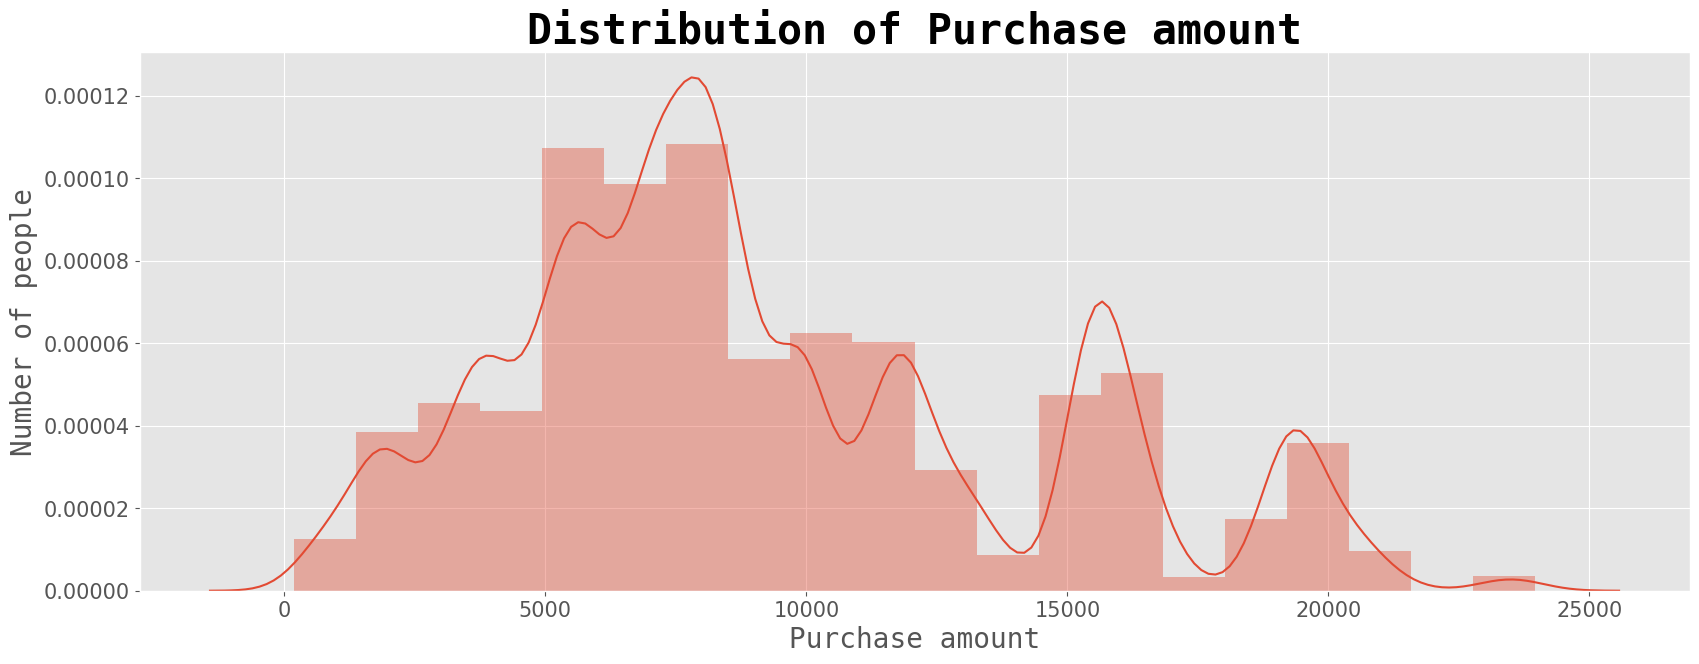

In [12]:
plt.style.use('ggplot')
plt.figure(figsize = (20, 7))
sns.distplot(train['Purchase'], bins = 20)
plt.title('Distribution of Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.tick_params(labelsize = 15)
plt.show()

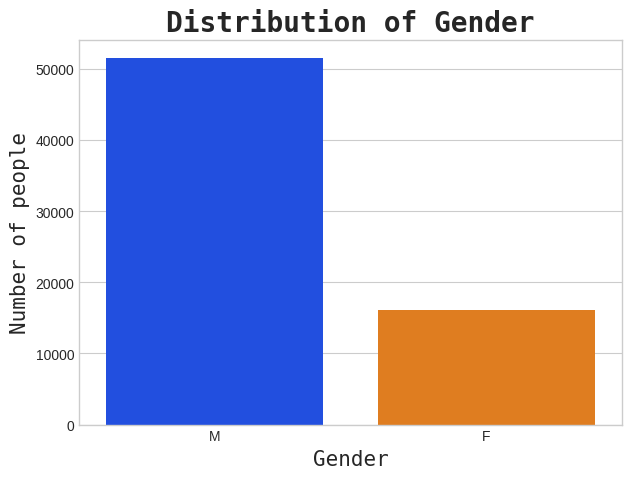

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

gen = train['Gender'].value_counts()

plt.figure(figsize = (7, 5))
plt.style.use('seaborn-whitegrid')
# Pass the data as a single argument using the 'x' and 'y' keywords
sns.barplot(x=gen.index, y=gen.values, palette = 'bright')
plt.title('Distribution of Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

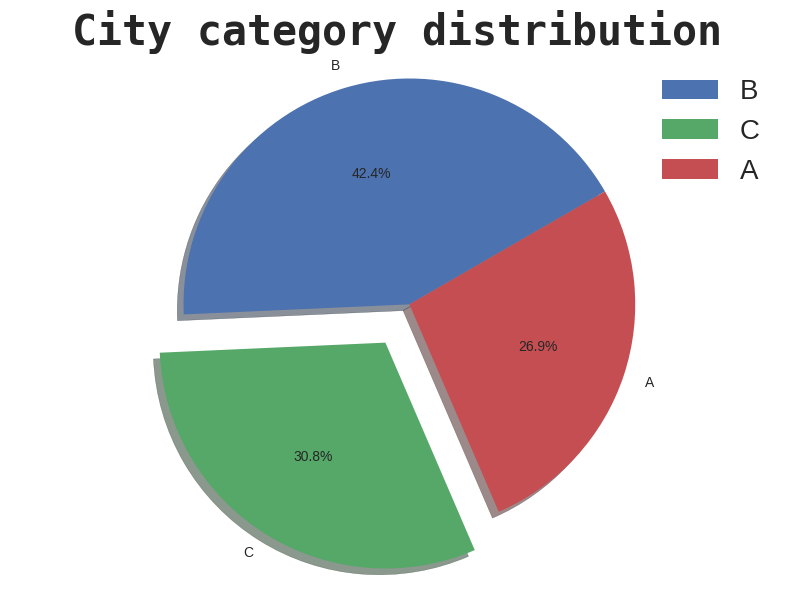

In [14]:
city = train['City_Category'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize = (10, 7))
plt.pie(city.values, labels = city.index, startangle = 30, explode = (0 , 0.20, 0), shadow = True, autopct = '%1.1f%%')
plt.title('City category distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.legend()
plt.legend(prop = {'size' : 20})
plt.axis('equal')
plt.show()

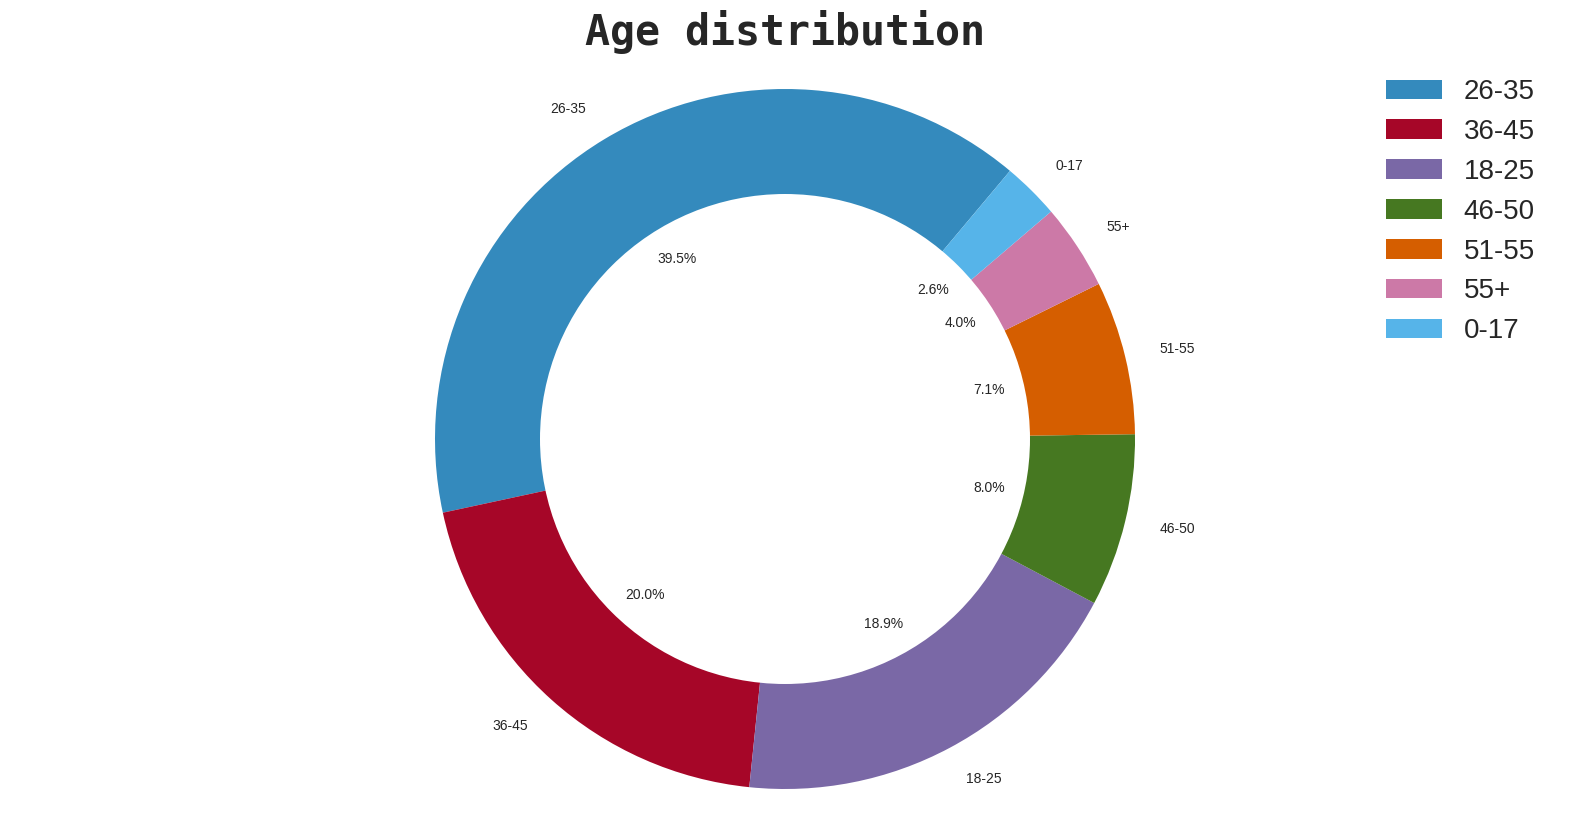

In [15]:
# Creating a donut chart for 'Age'
age = train['Age'].value_counts()

plt.style.use('bmh')
plt.figure(figsize = (20, 10))
plt.pie(age.values, labels = age.index, startangle = 50, autopct = '%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Age distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.axis('equal')
plt.legend(prop = {'size' : 20})
plt.show()

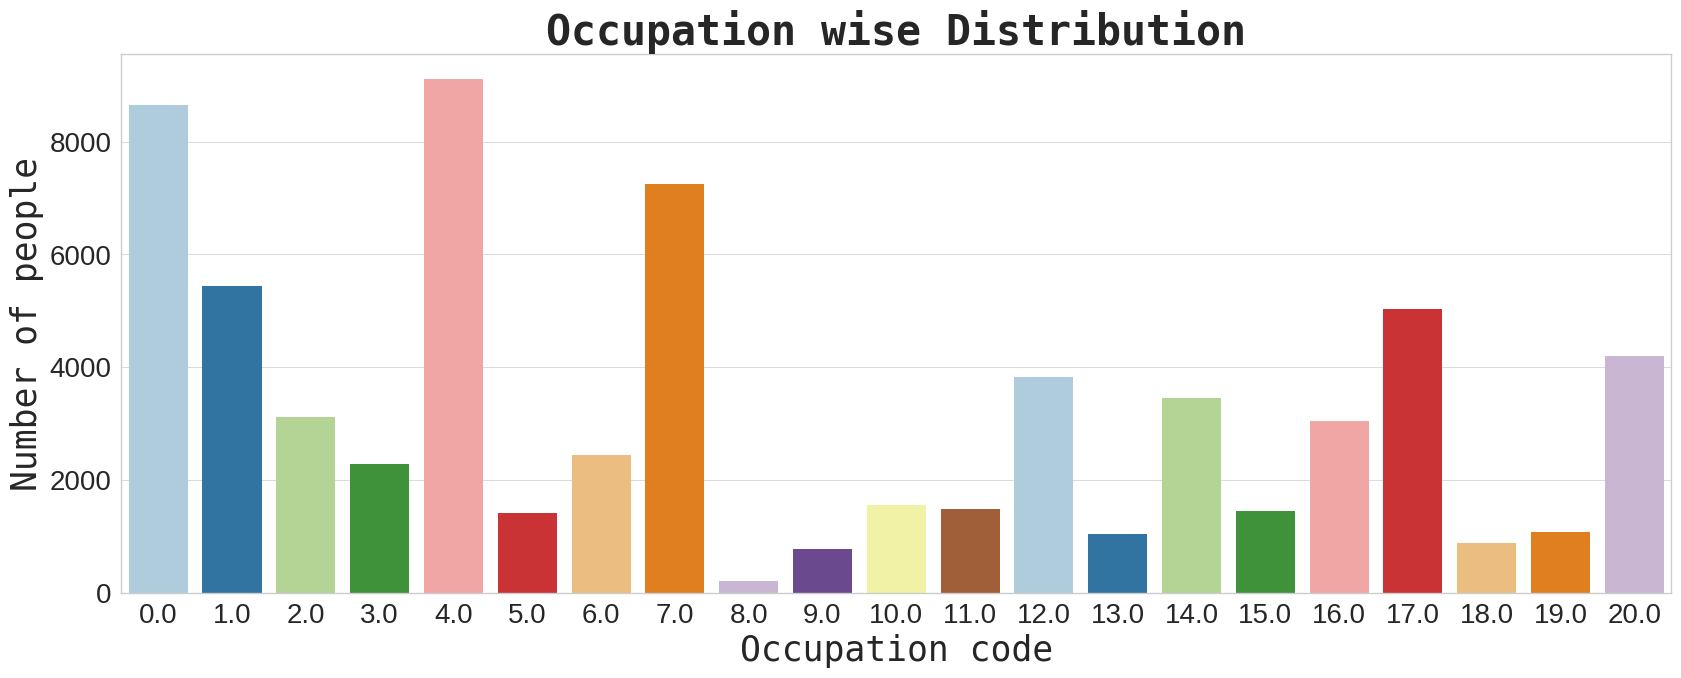

In [16]:
# Creating a barplot for 'Occupation'
occupation = train['Occupation'].value_counts()

plt.figure(figsize = (20, 7))
plt.style.use('seaborn-whitegrid')

# Pass the data as keyword arguments
sns.barplot(x=occupation.index, y=occupation.values, palette = 'Paired')

plt.title('Occupation wise Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Occupation code', fontdict = {'fontname' : 'Monospace', 'fontsize' : 25})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 25})
plt.tick_params(labelsize = 20)
plt.show()

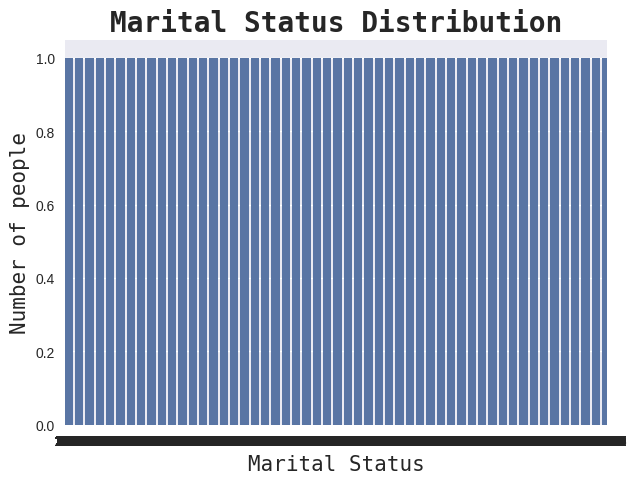

In [17]:
# Creating a countplot for 'Marital Status'
plt.style.use('seaborn')
plt.figure(figsize = (7, 5))
sns.countplot(train['Marital_Status'])
plt.title('Marital Status Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Marital Status', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

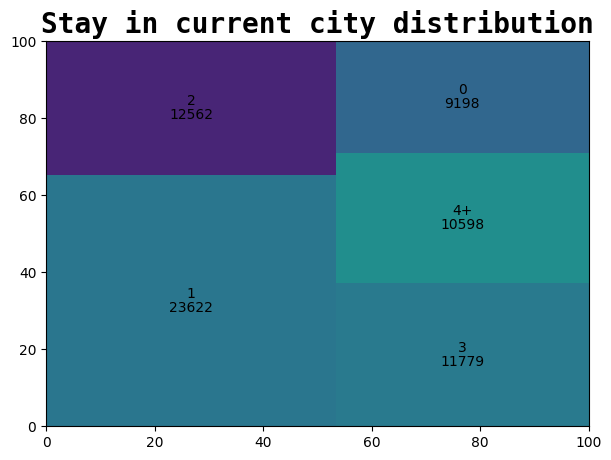

In [20]:
import squarify # Import the installed library
import matplotlib.pyplot as plt

# Creating a Treemap for 'Stay_In_Current_City_Years'
stay = train['Stay_In_Current_City_Years'].value_counts()

plt.style.use('default')
plt.figure(figsize = (7, 5))
squarify.plot(sizes = stay.values, label = stay.index, value = stay.values)
plt.title('Stay in current city distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.show()

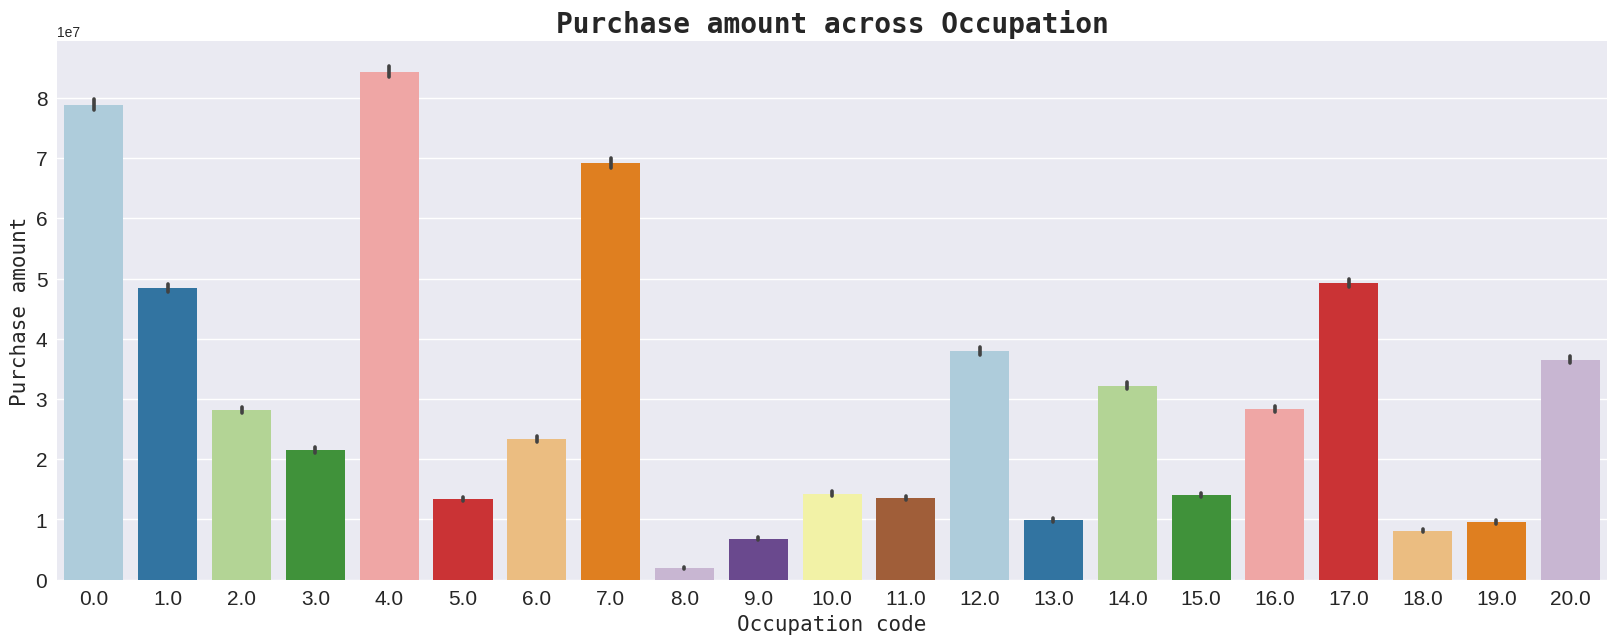

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a barplot of 'Occupation vs Purchase'
plt.figure(figsize = (20, 7))
plt.style.use('seaborn')
# Use the estimator parameter to specify how to aggregate 'Purchase' for each 'Occupation'
sns.barplot(x='Occupation', y='Purchase', data=train, palette = 'Paired', estimator=sum) # Use sum, mean or another aggregation function as needed
plt.title('Purchase amount across Occupation', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Occupation code', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 15)
plt.show()

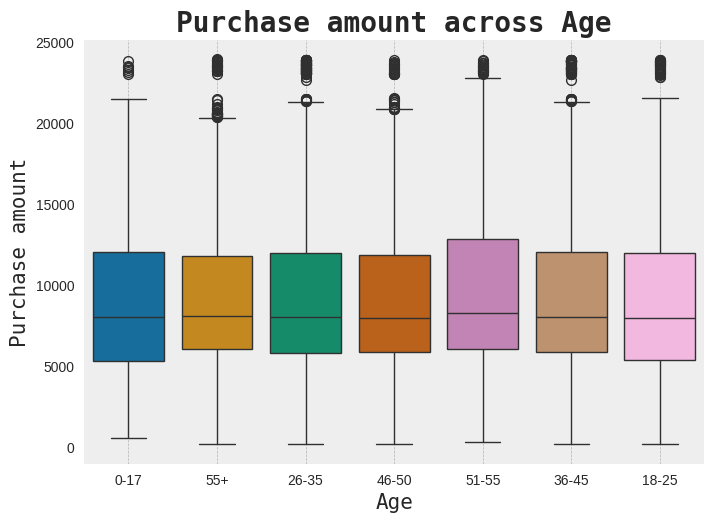

In [24]:
# Creating a boxplot of 'Age vs Purchase'
plt.style.use('bmh')
sns.boxplot(x='Age', y='Purchase', data=train, palette = 'colorblind') # Pass data and column names as parameters
plt.title('Purchase amount across Age', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Age', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.grid()
plt.show()

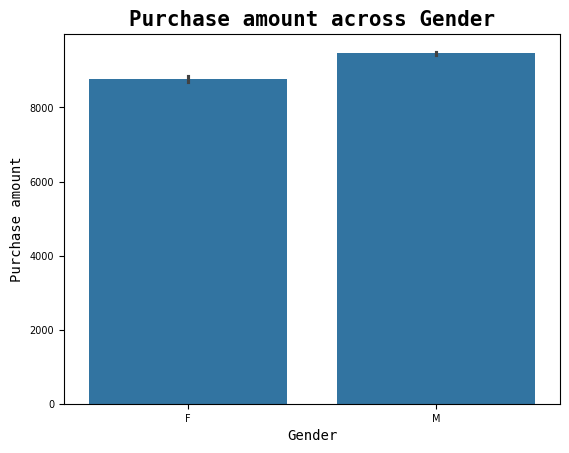

In [26]:
# Creating a barplot of 'Gender vs Purchase'
plt.style.use('default')
sns.barplot(x='Gender', y='Purchase', data=train) # Pass data and column names as parameters
plt.title('Purchase amount across Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15, 'fontweight' : 'bold'})
plt.xlabel('Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.tick_params(labelsize = 7)

plt.show()

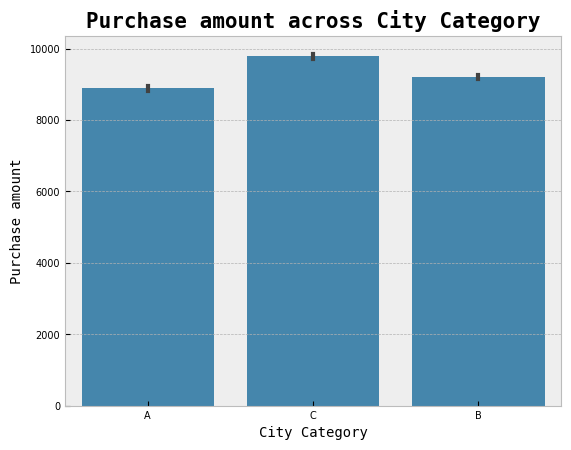

In [28]:
# Creating a barplot of 'City_Category vs Purchase'
plt.style.use('bmh')
# Pass data and column names as parameters
sns.barplot(x='City_Category', y='Purchase', data=train)
plt.title('Purchase amount across City Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15, 'fontweight' : 'bold'})
plt.xlabel('City Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.tick_params(labelsize = 7)
plt.show()

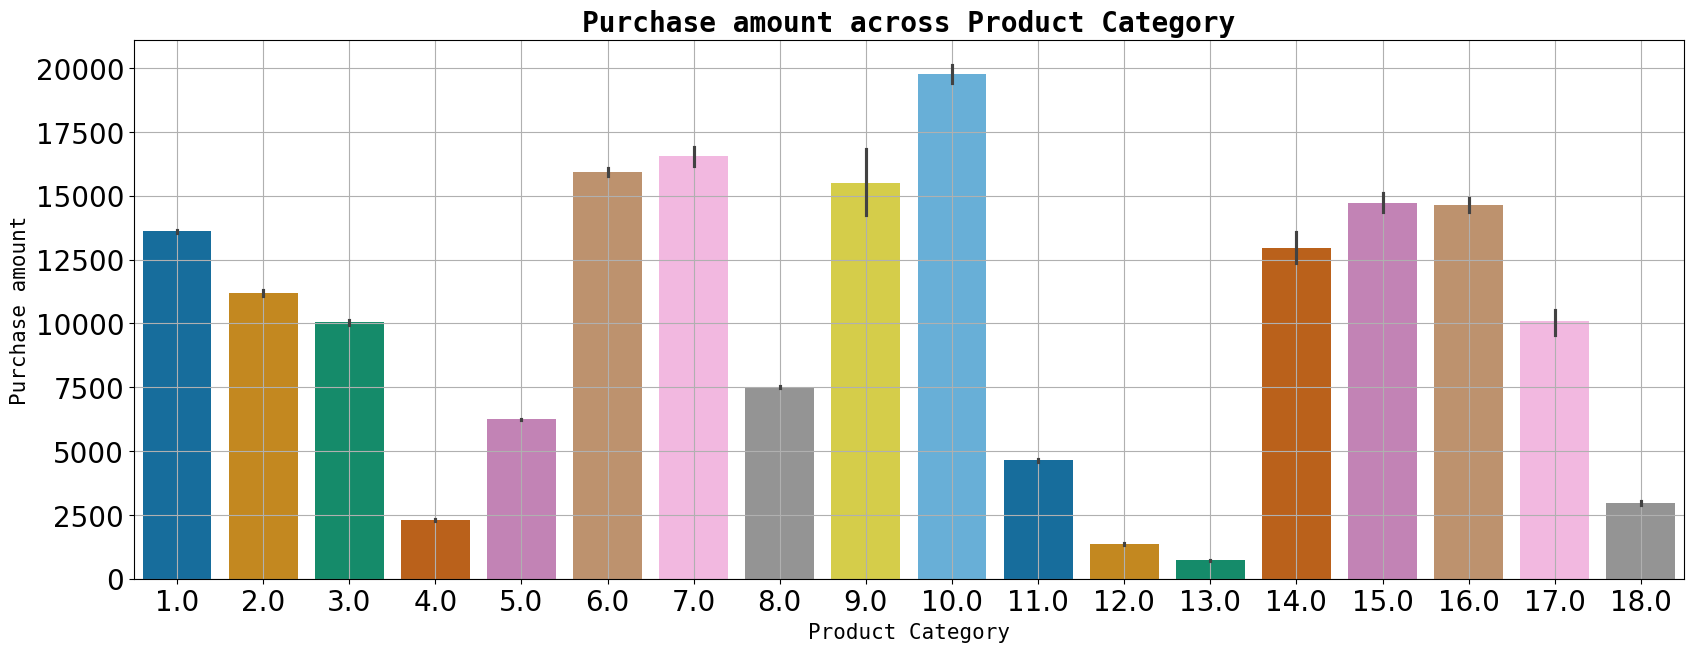

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a barplot of 'Product_Category_1 vs Purchase'
plt.style.use('default')
plt.figure(figsize = (20, 7))
# Pass the entire DataFrame and specify 'x' and 'y' columns
sns.barplot(x='Product_Category_1', y='Purchase', data=train, palette = 'colorblind')
plt.title('Purchase amount across Product Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Product Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 20)
plt.grid()
plt.show()

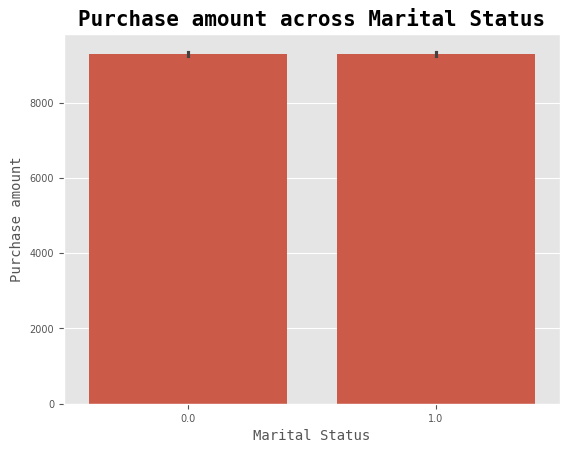

In [32]:
# Creating a barplot of 'Marital Status vs Purchase'
plt.style.use('ggplot')
sns.barplot(x='Marital_Status', y='Purchase', data=train) # Pass data and column names as parameters
plt.title('Purchase amount across Marital Status', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15, 'fontweight' : 'bold'})
plt.xlabel('Marital Status', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.tick_params(labelsize = 7)
plt.show()

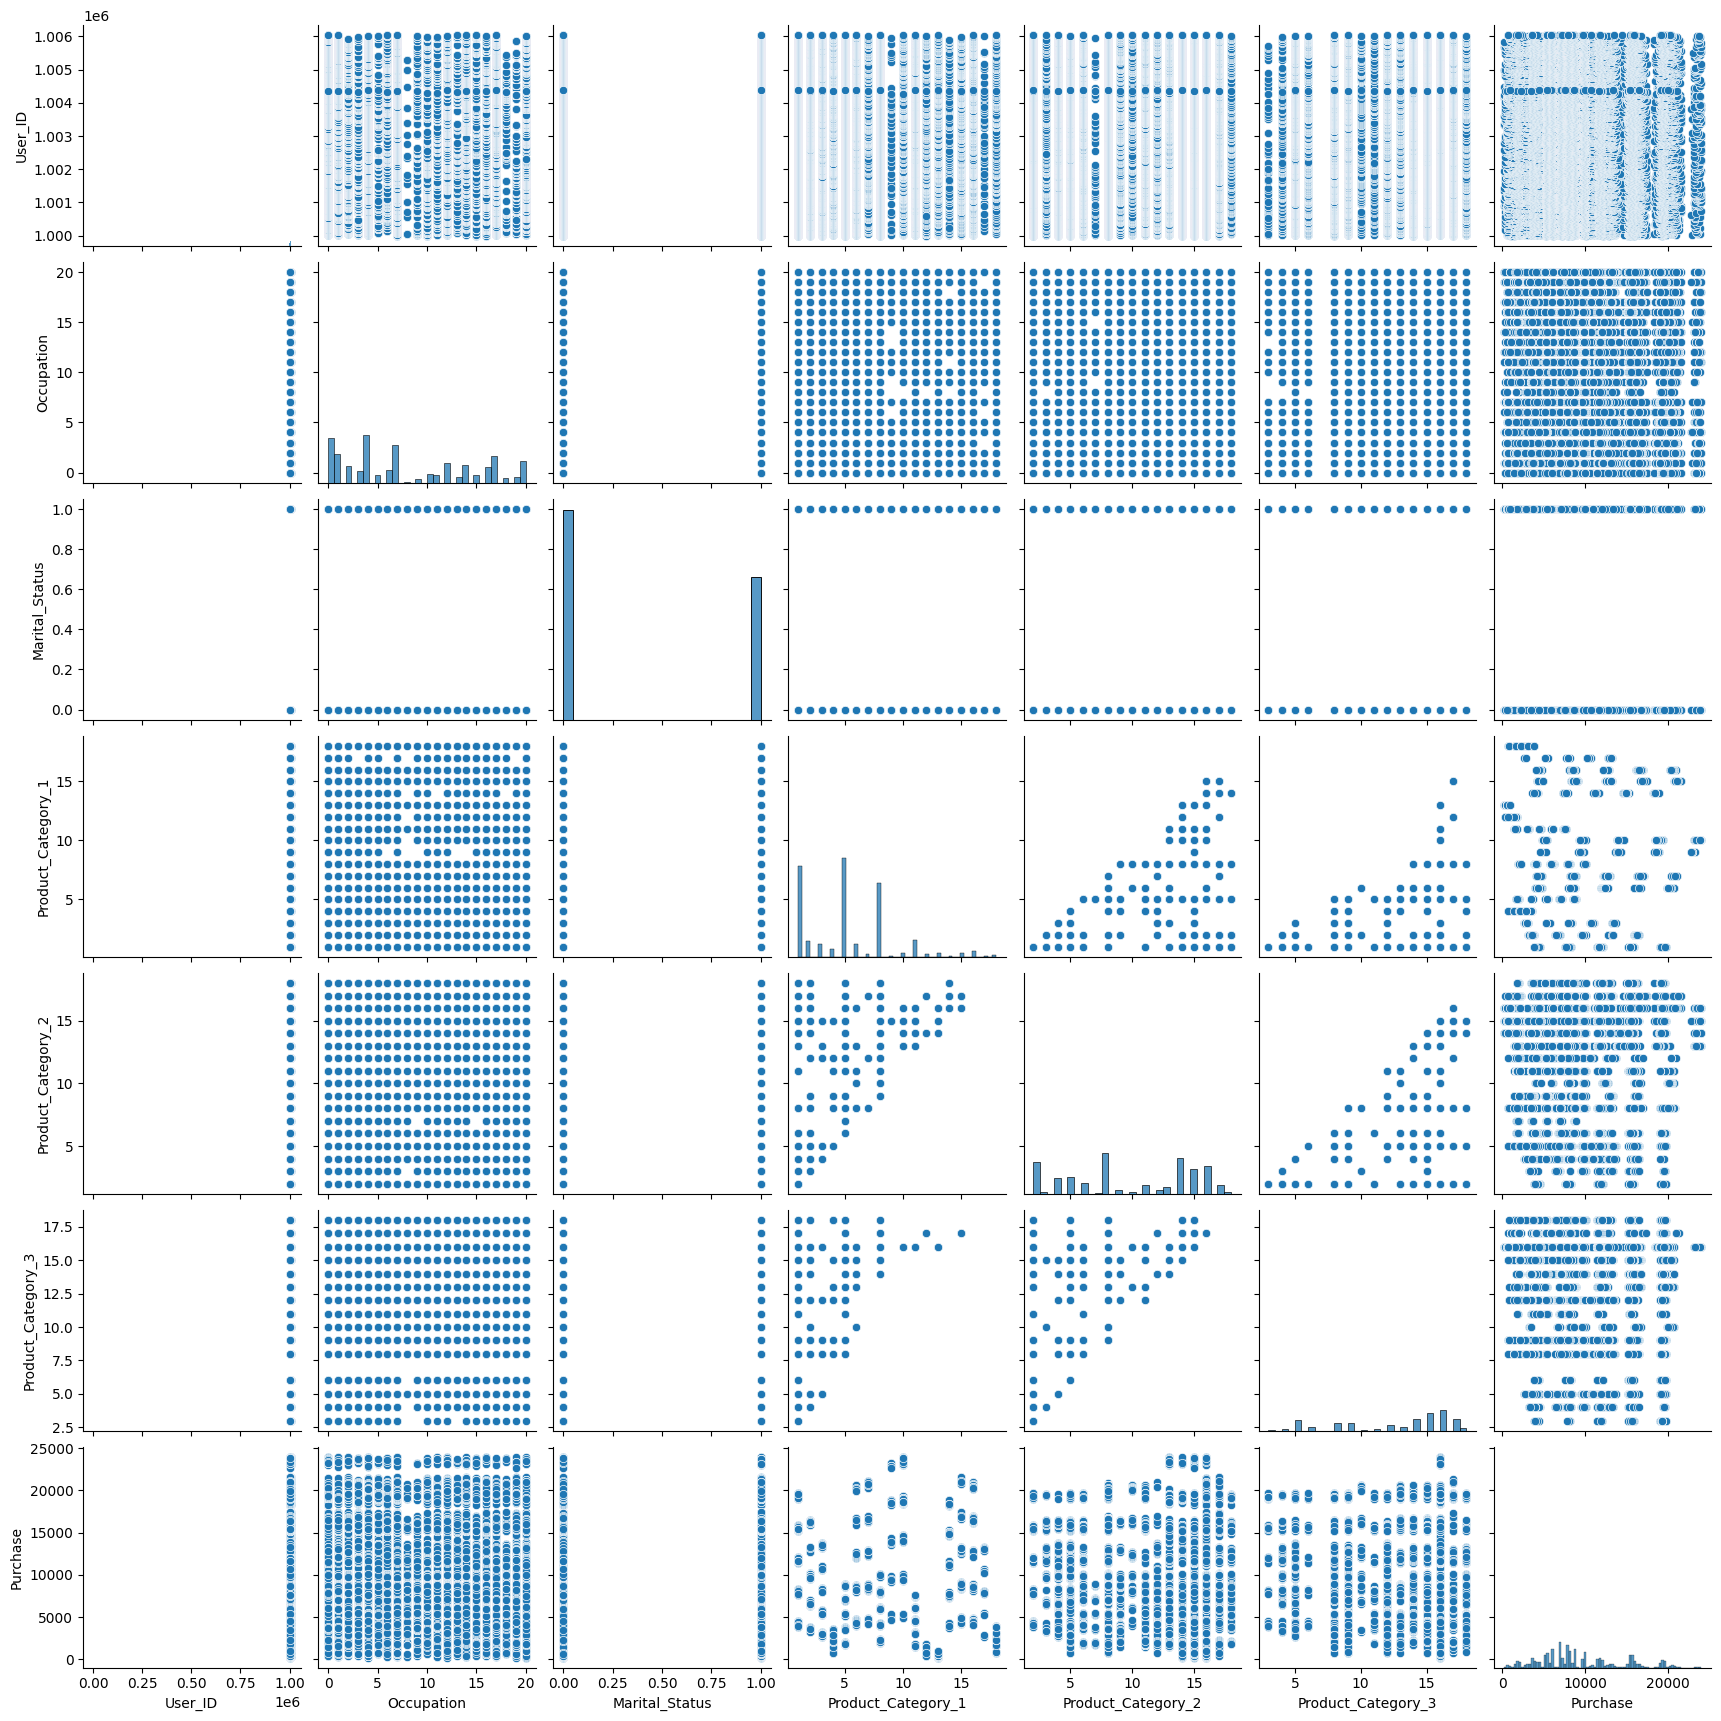

In [33]:
# Creating a Pairplot for all features
plt.style.use('default')
sns.pairplot(train)
plt.show()

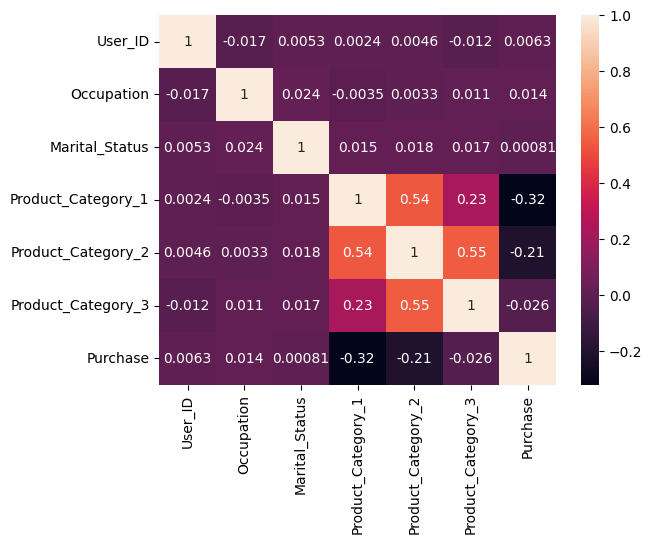

In [35]:
# Creating a heatmap of correlation matrix
# Select only numerical columns for correlation calculation
numerical_train = train.select_dtypes(include=['number'])
sns.heatmap(numerical_train.corr(), annot = True)
plt.show()

In [36]:
train['source'] = 'train'
test['source'] = 'test'

In [38]:
dataset = pd.concat([train, test])

In [39]:
dataset['Age'] = dataset['Age'].apply(lambda x : str(x).replace('55+', '55'))

In [40]:
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].apply(lambda x : str(x).replace('4+', '4'))


In [41]:
dataset.drop('Product_Category_3', axis = 1, inplace = True)


In [42]:
dataset.drop('User_ID', axis = 1, inplace = True)


In [43]:
dataset.drop('Product_ID', axis = 1, inplace = True)


In [44]:
from sklearn.preprocessing import LabelEncoder


In [45]:
label_encoder_gender = LabelEncoder()
dataset['Gender'] = label_encoder_gender.fit_transform(dataset['Gender'])

In [46]:

label_encoder_age = LabelEncoder()
dataset['Age'] = label_encoder_age.fit_transform(dataset['Age'])

In [47]:

label_encoder_city = LabelEncoder()
dataset['City_Category'] = label_encoder_city.fit_transform(dataset['City_Category'])

In [48]:
dataset['Product_Category_2'].fillna(dataset['Product_Category_2'].median(), inplace = True)

In [52]:
import pandas as pd
import numpy as np

# Replace non-numeric values with NaN
dataset['Stay_In_Current_City_Years'] = pd.to_numeric(dataset['Stay_In_Current_City_Years'], errors='coerce')

# Replace NaNs with 0
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].fillna(0)

# Convert the column to integers
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].astype(int)


In [53]:
train = dataset.loc[dataset['source'] == 'train']
test = dataset.loc[dataset['source'] == 'test']

In [54]:
train.drop('source', axis = 1, inplace = True)
test.drop('source', axis = 1, inplace = True)

In [55]:
X = train.drop("Purchase", axis = 1)

In [56]:
Y = train["Purchase"]

In [57]:

from sklearn.ensemble import ExtraTreesRegressor
selector = ExtraTreesRegressor()

In [62]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import ExtraTreesRegressor

# Assume X and Y are already defined DataFrames/Series
non_nan_indices = Y.dropna().index
X_non_nan = X.loc[non_nan_indices]
Y_non_nan = Y.loc[non_nan_indices]

print("Number of rows after removing NaNs in Y:", len(X_non_nan))

imputer = SimpleImputer(strategy='mean')  # Or other strategies like 'median', 'most_frequent'
X_imputed = pd.DataFrame(imputer.fit_transform(X_non_nan), columns=X.columns)

selector = ExtraTreesRegressor()
selector.fit(X_imputed, Y_non_nan)
X_dropped = X.dropna()  # Drop rows with any missing values
Y_dropped = Y[X_dropped.index]  # Adjust Y accordingly

selector = ExtraTreesRegressor()
selector.fit(X_dropped, Y_dropped)


Number of rows after removing NaNs in Y: 67759


ExtraTreesRegressor()

In [63]:
feature_imp = selector.feature_importances_

In [65]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 0.91
1 4.01
2 8.3
3 1.15
4 4.35
5 1.24
6 70.62
7 9.42


In [66]:
X.drop(['Gender', 'City_Category', 'Marital_Status'], axis = 1, inplace = True)

In [67]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [68]:

for col in X.columns:
  X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)


In [70]:

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (54208, 5)
X_test shape: (13552, 5)
Y_train shape: (54208,)
Y_test shape: (13552,)


In [71]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Assuming 'X' and 'Y' are already defined DataFrames

# Handle missing values before scaling
imputer = SimpleImputer(strategy='mean')  # Or another strategy like 'median'
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Scale the imputed data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_imputed.columns)

# Handle missing values in 'Y' as well
Y_imputed = pd.Series(imputer.fit_transform(Y.values.reshape(-1, 1)).ravel(), name=Y.name)

# Split the data into train and test sets using the imputed Y
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_imputed, test_size=0.2, random_state=42)

# Train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)  # Should now work without the ValueError

LinearRegression()

In [76]:
Y_pred_lin_reg = lin_reg.predict(X_test)

In [77]:

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [78]:
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [79]:

Y_pred_knn = knn.predict(X_test)

In [80]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()

In [81]:
dec_tree.fit(X_train, Y_train)

DecisionTreeRegressor()

In [82]:
Y_pred_dec = dec_tree.predict(X_test)

In [83]:
from sklearn.ensemble import RandomForestRegressor
ran_for = RandomForestRegressor()

In [84]:
ran_for.fit(X_train, Y_train)

RandomForestRegressor()

In [85]:
Y_pred_ran_for = ran_for.predict(X_test)

In [86]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state = 42)

In [87]:
xgb.fit(X_train, Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [88]:
Y_pred_xgb = xgb.predict(X_test)

In [89]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [90]:
print("Linear Regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_lin_reg)))
print("R2 score:", r2_score(Y_test, Y_pred_lin_reg))

Linear Regression: 
RMSE: 4670.533628474724
R2 score: 0.09770767270214498


In [91]:
print("KNN regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_knn)))
print("R2 score:", r2_score(Y_test, Y_pred_knn))

KNN regression: 
RMSE: 3548.349643401843
R2 score: 0.47920468092272195


In [92]:
print("Decision tree regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_dec)))
print("R2 score:", r2_score(Y_test, Y_pred_dec))

Decision tree regression: 
RMSE: 3420.0474478517754
R2 score: 0.5161859011131897


In [93]:
print("Random forest regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_ran_for)))
print("R2 score:", r2_score(Y_test, Y_pred_ran_for))

Random forest regression: 
RMSE: 3210.9915045166335
R2 score: 0.5735259891478511


In [94]:
print("XGB regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_xgb)))
print("R2 score:", r2_score(Y_test, Y_pred_xgb))

XGB regression: 
RMSE: 3042.884578706886
R2 score: 0.617011956499766


In [95]:
from sklearn.model_selection import RandomizedSearchCV

In [96]:
max_depth = [int(x) for x in np.linspace(start = 5, stop = 20, num = 15)]
learning_rate = ['0.01', '0.05', '0.1', '0.25', '0.5', '0.75', '1.0']
min_child_weight = [int(x) for x in np.linspace(start = 45, stop = 70, num = 15)]

In [97]:
params = {
 "learning_rate"    : learning_rate,
 "max_depth"        : max_depth,
 "min_child_weight" : min_child_weight,
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]
}

In [98]:
xgb_tune = XGBRegressor(verbosity = 0, random_state = 42)

In [99]:
xgb_cv = RandomizedSearchCV(xgb_tune, param_distributions = params, cv = 5, random_state = 42)


In [100]:
xgb_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': ['0.01', '0.05', '0.1',
                                                          '0.25', '0.5', '0.75',
                                                          '1.0'],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      20],
                                        'min_child_weight': [45, 46, 48, 50, 52,
                                                             53, 55, 57, 59, 61,
                                                             62, 64, 66, 68,
                                                             70]},
                   random_state=42)

In [101]:
xgb_cv.best_score_

0.6396880953961729

In [102]:
xgb_cv.best_params_

{'min_child_weight': 61,
 'max_depth': 7,
 'learning_rate': '0.5',
 'gamma': 0.2,
 'colsample_bytree': 0.4}

In [103]:
xgb_best = XGBRegressor(colsample_bytree = 0.7, gamma = 0.3, learning_rate = 1.0, max_depth = 11, min_child_weight = 66, verbosity = 0, random_state = 42)

In [104]:
xgb_best.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.3, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=66, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [105]:
Y_pred_xgb_best = xgb_best.predict(X_test)

In [106]:

print("XGB regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_xgb_best)))
print("R2 score:", r2_score(Y_test, Y_pred_xgb_best))

XGB regression: 
RMSE: 3081.193226300214
R2 score: 0.6073079343849321
